In [48]:
# importing  modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose,STL
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


In [49]:
df = pd.read_csv('df.csv')
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,ALUMINIUM,ZINC,NICKEL,WHEAT,SUGAR,COFFEE,COTTON,BOND_10Y,Dollar_Index
0,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,1617.50,1215.00,8314.0,247.25,5.77,116.25,50.73,6.485,100.410004
1,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,1636.50,1209.25,8307.0,249.75,5.81,118.60,51.56,6.599,100.379997
2,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,1639.75,1212.00,8252.0,248.50,5.77,116.85,52.08,6.549,100.650002
3,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,1652.00,1209.25,8174.0,251.75,5.84,114.15,53.96,6.504,100.800003
4,2000-01-10,2.216,282.7,24.67,23.73,466.25,208.50,0.8465,1636.75,1196.75,8130.0,253.50,5.83,117.55,53.56,6.558,100.989998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,2023-07-27,2.492,1945.7,80.09,84.24,1532.00,533.25,3.8635,2173.76,2460.50,21519.0,712.75,24.43,161.45,86.62,4.012,101.769997
5880,2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,2256.51,2571.31,22127.0,665.75,24.11,164.65,85.44,3.959,101.860001
5881,2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,2221.06,2574.80,22189.0,652.25,24.39,164.55,86.87,4.051,102.300003
5882,2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,2170.01,2486.50,21379.0,640.00,24.20,166.95,85.08,4.078,102.589996


We have to find % change for better performance

In [50]:
# Convert columns to numeric (ignore errors for non-numeric values)
df = df.apply(pd.to_numeric, errors='coerce')
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,ALUMINIUM,ZINC,NICKEL,WHEAT,SUGAR,COFFEE,COTTON,BOND_10Y,Dollar_Index
0,NaN,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,1617.50,1215.00,8314.0,247.25,5.77,116.25,50.73,6.485,100.410004
1,NaN,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,1636.50,1209.25,8307.0,249.75,5.81,118.60,51.56,6.599,100.379997
2,NaN,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,1639.75,1212.00,8252.0,248.50,5.77,116.85,52.08,6.549,100.650002
3,NaN,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,1652.00,1209.25,8174.0,251.75,5.84,114.15,53.96,6.504,100.800003
4,NaN,2.216,282.7,24.67,23.73,466.25,208.50,0.8465,1636.75,1196.75,8130.0,253.50,5.83,117.55,53.56,6.558,100.989998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,NaN,2.492,1945.7,80.09,84.24,1532.00,533.25,3.8635,2173.76,2460.50,21519.0,712.75,24.43,161.45,86.62,4.012,101.769997
5880,NaN,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,2256.51,2571.31,22127.0,665.75,24.11,164.65,85.44,3.959,101.860001
5881,NaN,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,2221.06,2574.80,22189.0,652.25,24.39,164.55,86.87,4.051,102.300003
5882,NaN,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,2170.01,2486.50,21379.0,640.00,24.20,166.95,85.08,4.078,102.589996


In [51]:
# Calculate percent change for all columns and create new columns
for column in df.columns:
    df[column + '_Percent_Change'] = ((df[column] - df[column].shift(1)) / df[column].shift(1)) * 100
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,ALUMINIUM,ZINC,...,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
0,NaN,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,1617.50,1215.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,1636.50,1209.25,...,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,NaN,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,1639.75,1212.00,...,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,NaN,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,1652.00,1209.25,...,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,NaN,2.216,282.7,24.67,23.73,466.25,208.50,0.8465,1636.75,1196.75,...,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,NaN,2.492,1945.7,80.09,84.24,1532.00,533.25,3.8635,2173.76,2460.50,...,-0.693998,-0.423271,-0.449102,0.485641,-1.006944,0.164002,-1.041986,-3.734163,4.180733,0.872234
5880,NaN,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,2256.51,2571.31,...,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,NaN,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,2221.06,2574.80,...,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,NaN,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,2170.01,2486.50,...,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [52]:
df.isnull().sum()

Date                           5884
NATURAL GAS                       0
GOLD                              0
WTI CRUDE                         0
BRENT CRUDE                       0
SOYBEANS                          0
CORN                              0
COPPER                            0
ALUMINIUM                         0
ZINC                              0
NICKEL                            0
WHEAT                             0
SUGAR                             0
COFFEE                            0
COTTON                            0
BOND_10Y                          0
Dollar_Index                      0
Date_Percent_Change            5884
NATURAL GAS_Percent_Change        1
GOLD_Percent_Change               1
WTI CRUDE_Percent_Change          1
BRENT CRUDE_Percent_Change        1
SOYBEANS_Percent_Change           1
CORN_Percent_Change               1
COPPER_Percent_Change             1
ALUMINIUM_Percent_Change          1
ZINC_Percent_Change               1
NICKEL_Percent_Change       

In [53]:
# drop unwanted columns
df = df .drop(columns= ['NATURAL GAS', 'GOLD', 'WTI CRUDE', 'BRENT CRUDE', 'SOYBEANS',
       'CORN', 'COPPER', 'ALUMINIUM', 'ZINC', 'NICKEL', 'WHEAT', 'SUGAR',
       'COFFEE', 'COTTON', 'BOND_10Y',
       'Dollar_Index','Date','Date_Percent_Change'])
df

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,-6.491557,-1.238516,1.662859,1.591896,-0.921584,-1.295696,-0.693998,-0.423271,-0.449102,0.485641,-1.006944,0.164002,-1.041986,-3.734163,4.180733,0.872234
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [54]:
df = df.dropna()
df

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,0.098619,-2.744425,0.212675,1.157580,1.616346,-0.425785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,-6.491557,-1.238516,1.662859,1.591896,-0.921584,-1.295696,-0.693998,-0.423271,-0.449102,0.485641,-1.006944,0.164002,-1.041986,-3.734163,4.180733,0.872234
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [55]:
df.columns

Index(['NATURAL GAS_Percent_Change', 'GOLD_Percent_Change',
       'WTI CRUDE_Percent_Change', 'BRENT CRUDE_Percent_Change',
       'SOYBEANS_Percent_Change', 'CORN_Percent_Change',
       'COPPER_Percent_Change', 'ALUMINIUM_Percent_Change',
       'ZINC_Percent_Change', 'NICKEL_Percent_Change', 'WHEAT_Percent_Change',
       'SUGAR_Percent_Change', 'COFFEE_Percent_Change',
       'COTTON_Percent_Change', 'BOND_10Y_Percent_Change',
       'Dollar_Index_Percent_Change'],
      dtype='object')

Cheaking for Outliers

In [56]:
df1  =pd.DataFrame()

1. by using visual representation

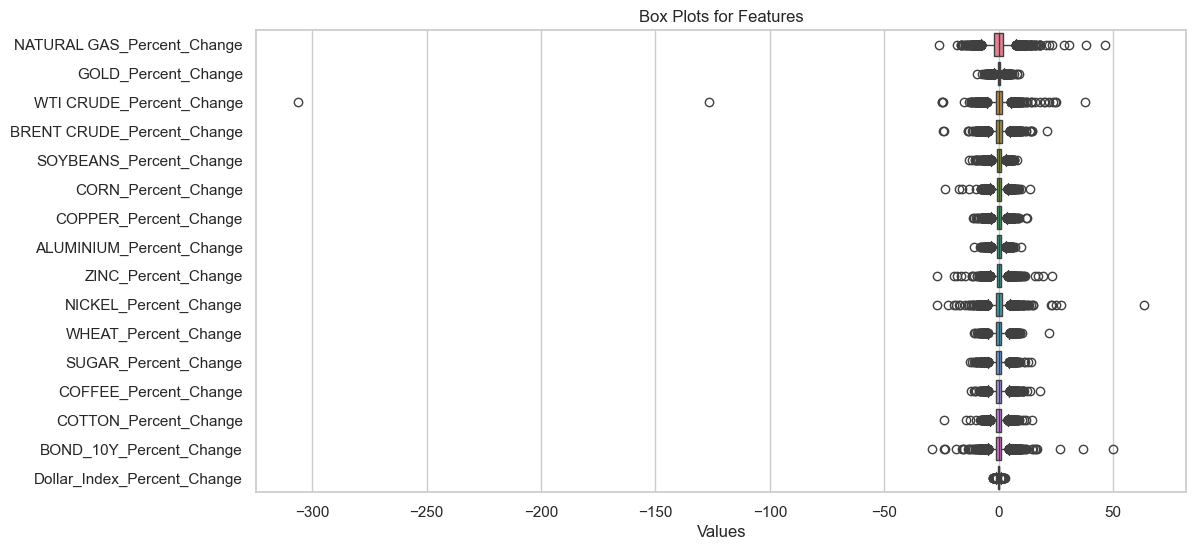

In [57]:
#Box plot

# Assuming 'your_data' is a DataFrame with your dataset
sns.set(style="whitegrid")  # Set the plot style

# Create box plots for each feature
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(data=df, orient="h")  # Horizontal box plots
plt.title("Box Plots for Features")
plt.xlabel("Values")
plt.show()

In [58]:
# Isolation Forestt
isolation_forest = IsolationForest()
isolation_forest_labels = isolation_forest.fit_predict(df)
isolation_forest_outliers = np.where(isolation_forest_labels == -1)[0]
len(isolation_forest_outliers)

161

In [59]:
#Z Score
from scipy import stats
z_scores = stats.zscore(df)
threshold = 3  # You can adjust this threshold as needed
z_score_outliers = np.where(np.abs(z_scores) > threshold)[0]
len(z_score_outliers)


1141

In [60]:
# Calculate IQR
Q1 = np.percentile(df, 25)
Q3 = np.percentile(df, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = np.where((df < lower_bound) | (df > upper_bound))[0]
len(iqr_outliers)

5918

In [61]:
outliers = set(z_score_outliers) & set(isolation_forest_outliers) & set(iqr_outliers)
len(outliers)

152

In [62]:
df1 = df.drop(outliers)
df1

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,0.098619,-2.744425,0.212675,1.157580,1.616346,-0.425785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,-5.294311,-1.215067,0.803213,1.614907,-1.559301,-0.453872
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [63]:
df1.describe()

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
count,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000,5731.000000
mean,0.085239,0.042323,0.082286,0.067956,0.038283,0.039300,0.049740,0.022765,0.039075,0.032382,0.046678,0.048784,0.031799,0.034335,0.031857,0.000112
std,3.679750,1.078400,2.548023,2.246705,1.545024,1.781999,1.633452,1.394817,1.996793,2.473896,2.013320,2.064155,2.138460,1.896267,2.315705,0.487033
min,-25.953711,-9.353764,-24.557261,-13.443396,-12.927536,-23.556664,-11.049724,-7.970461,-27.158596,-26.884831,-10.483535,-12.690355,-12.055780,-23.884977,-18.550109,-2.488265
25%,-1.895068,-0.469709,-1.235005,-1.107405,-0.758591,-0.932583,-0.811150,-0.785573,-0.918712,-1.173504,-1.196770,-1.124446,-1.219946,-0.948465,-1.133400,-0.278428
50%,0.000000,0.039879,0.121122,0.107124,0.081673,0.000000,0.024166,0.000000,0.000000,0.000000,-0.039017,0.000000,0.000000,0.000000,-0.059494,0.000000
75%,1.883210,0.607493,1.382828,1.254831,0.883392,0.977549,0.920719,0.798434,1.017196,1.263934,1.173375,1.191831,1.160880,0.984593,1.081654,0.279674
max,46.481178,9.007850,37.662338,21.018593,7.927786,13.606557,11.964286,9.753136,23.355610,27.349159,21.776098,13.953488,18.094273,14.593207,49.899801,2.555823


In [64]:
# Convert columns to numeric, handling errors
df1 = df1.apply(pd.to_numeric, errors='coerce')
df1 = df1[(df1 > -20) & (df1 < 20)]
df1

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,0.098619,-2.744425,0.212675,1.157580,1.616346,-0.425785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,-5.294311,-1.215067,0.803213,1.614907,-1.559301,-0.453872
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [65]:
df1.describe()

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
count,5723.000000,5731.000000,5725.000000,5730.000000,5731.000000,5730.000000,5731.000000,5731.000000,5729.000000,5725.000000,5730.000000,5731.000000,5731.000000,5730.000000,5730.000000,5731.000000
mean,0.053267,0.042323,0.063659,0.064300,0.038283,0.043418,0.049740,0.022765,0.039752,0.023782,0.042886,0.048784,0.031799,0.038509,0.023154,0.000112
std,3.500641,1.078400,2.400065,2.229784,1.545024,1.754671,1.633452,1.394817,1.940237,2.342249,1.992921,2.064155,2.138460,1.869912,2.220198,0.487033
min,-18.044454,-9.353764,-15.248363,-13.443396,-12.927536,-17.386530,-11.049724,-7.970461,-19.610348,-19.391635,-10.483535,-12.690355,-12.055780,-14.405286,-18.550109,-2.488265
25%,-1.896960,-0.469709,-1.236109,-1.107629,-0.758591,-0.931399,-0.811150,-0.785573,-0.917958,-1.173419,-1.196789,-1.124446,-1.219946,-0.948033,-1.134064,-0.278428
50%,0.000000,0.039879,0.120904,0.107028,0.081673,0.000000,0.024166,0.000000,0.000000,0.000000,-0.040127,0.000000,0.000000,0.000000,-0.059670,0.000000
75%,1.876397,0.607493,1.377817,1.254274,0.883392,0.977601,0.920719,0.798434,1.016995,1.258863,1.172905,1.191831,1.160880,0.984691,1.080384,0.279674
max,18.165249,9.007850,19.738752,14.613085,7.927786,13.606557,11.964286,9.753136,19.329743,15.010048,9.164733,13.953488,18.094273,14.593207,16.829270,2.555823


In [66]:
df1.isnull().sum()

NATURAL GAS_Percent_Change     8
GOLD_Percent_Change            0
WTI CRUDE_Percent_Change       6
BRENT CRUDE_Percent_Change     1
SOYBEANS_Percent_Change        0
CORN_Percent_Change            1
COPPER_Percent_Change          0
ALUMINIUM_Percent_Change       0
ZINC_Percent_Change            2
NICKEL_Percent_Change          6
WHEAT_Percent_Change           1
SUGAR_Percent_Change           0
COFFEE_Percent_Change          0
COTTON_Percent_Change          1
BOND_10Y_Percent_Change        1
Dollar_Index_Percent_Change    0
dtype: int64

In [67]:
df1 = df1.dropna()
df1

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,0.098619,-2.744425,0.212675,1.157580,1.616346,-0.425785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,-5.294311,-1.215067,0.803213,1.614907,-1.559301,-0.453872
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [68]:
df1.isnull().sum()

NATURAL GAS_Percent_Change     0
GOLD_Percent_Change            0
WTI CRUDE_Percent_Change       0
BRENT CRUDE_Percent_Change     0
SOYBEANS_Percent_Change        0
CORN_Percent_Change            0
COPPER_Percent_Change          0
ALUMINIUM_Percent_Change       0
ZINC_Percent_Change            0
NICKEL_Percent_Change          0
WHEAT_Percent_Change           0
SUGAR_Percent_Change           0
COFFEE_Percent_Change          0
COTTON_Percent_Change          0
BOND_10Y_Percent_Change        0
Dollar_Index_Percent_Change    0
dtype: int64

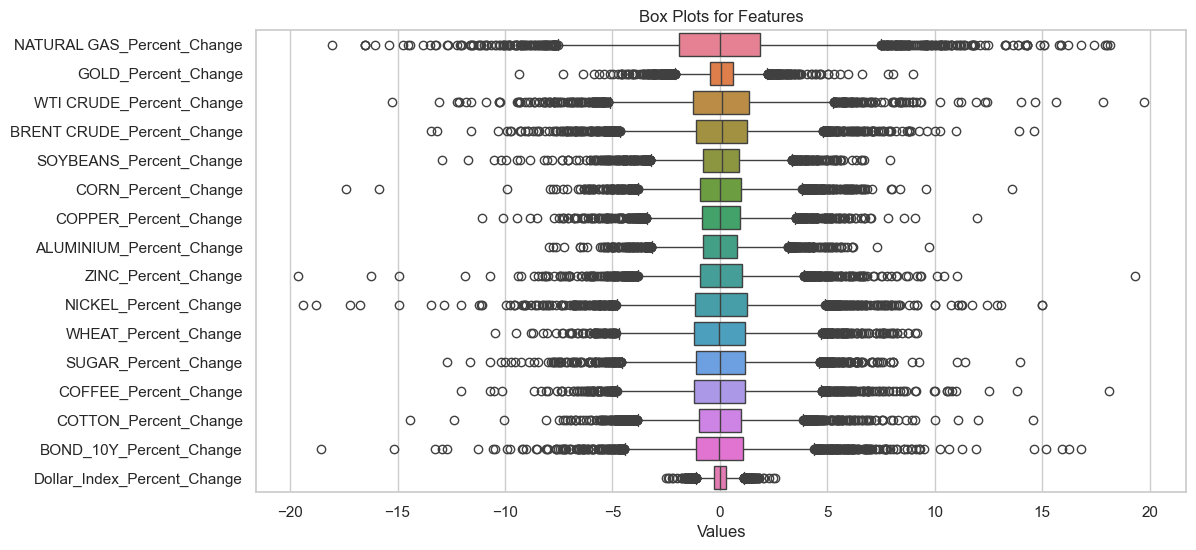

In [69]:
#Box plot

# Assuming 'your_data' is a DataFrame with your dataset
sns.set(style="whitegrid")  # Set the plot style

# Create box plots for each feature
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(data=df1, orient="h")  # Horizontal box plots
plt.title("Box Plots for Features")
plt.xlabel("Values")
plt.show()

In [70]:
df1.columns

Index(['NATURAL GAS_Percent_Change', 'GOLD_Percent_Change',
       'WTI CRUDE_Percent_Change', 'BRENT CRUDE_Percent_Change',
       'SOYBEANS_Percent_Change', 'CORN_Percent_Change',
       'COPPER_Percent_Change', 'ALUMINIUM_Percent_Change',
       'ZINC_Percent_Change', 'NICKEL_Percent_Change', 'WHEAT_Percent_Change',
       'SUGAR_Percent_Change', 'COFFEE_Percent_Change',
       'COTTON_Percent_Change', 'BOND_10Y_Percent_Change',
       'Dollar_Index_Percent_Change'],
      dtype='object')

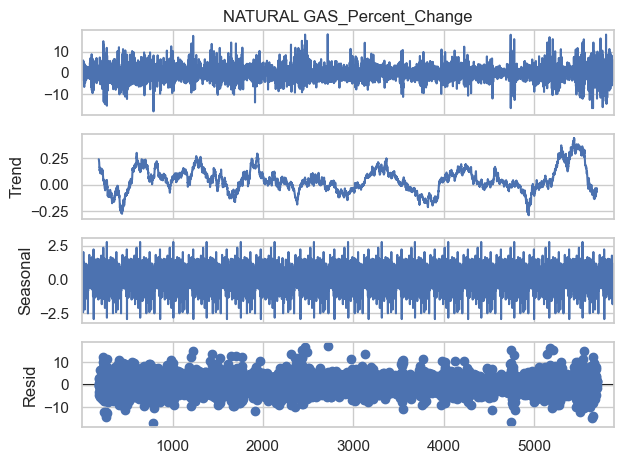

In [71]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['NATURAL GAS_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

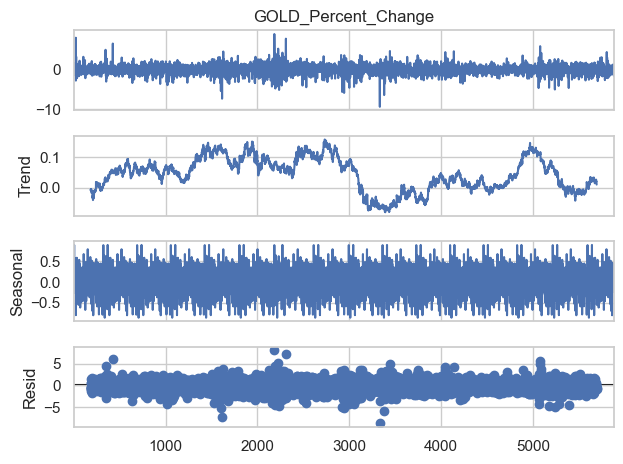

In [72]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['GOLD_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

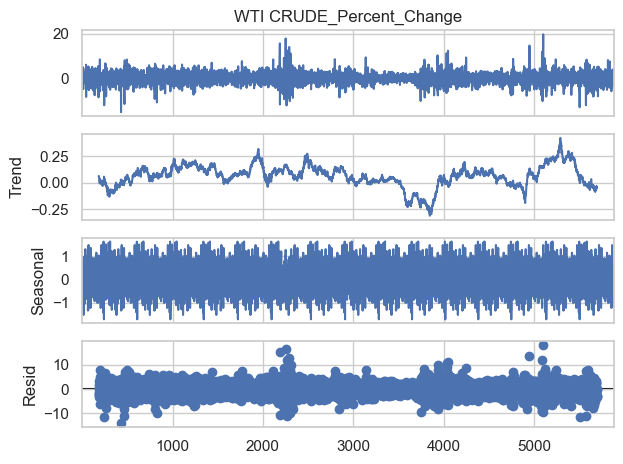

In [73]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['WTI CRUDE_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

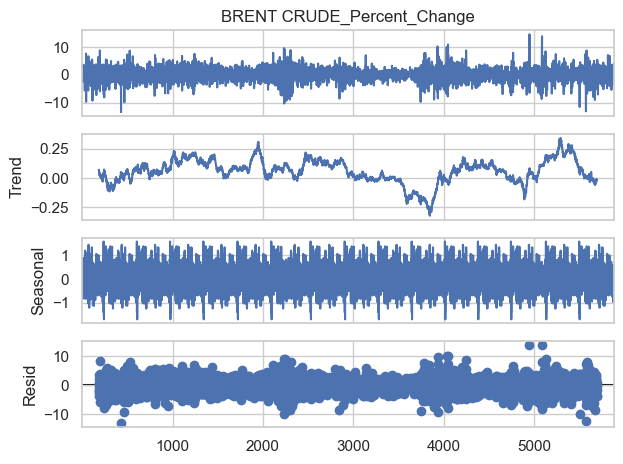

In [74]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['BRENT CRUDE_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

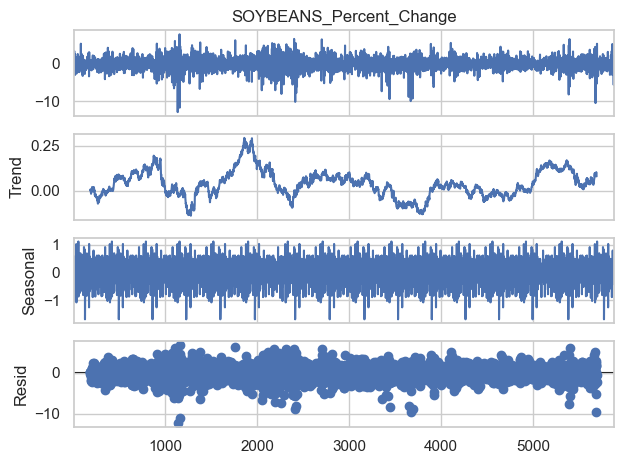

In [75]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['SOYBEANS_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

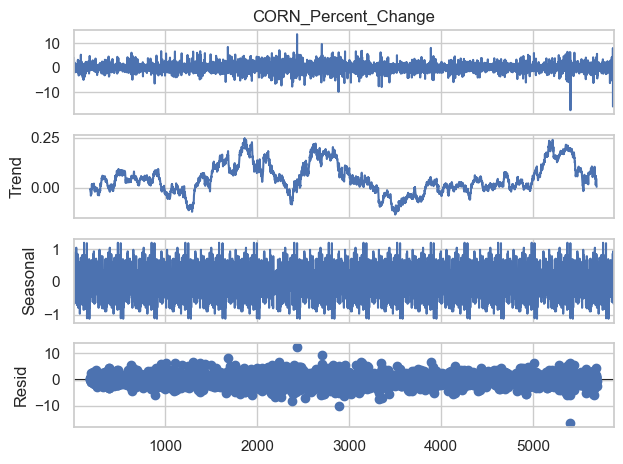

In [76]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['CORN_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

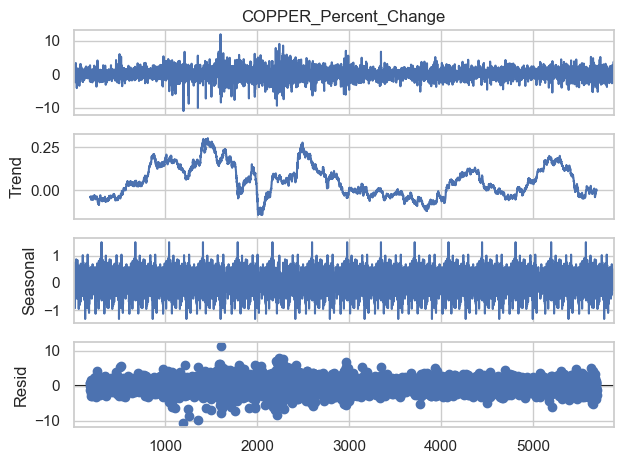

In [77]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['COPPER_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

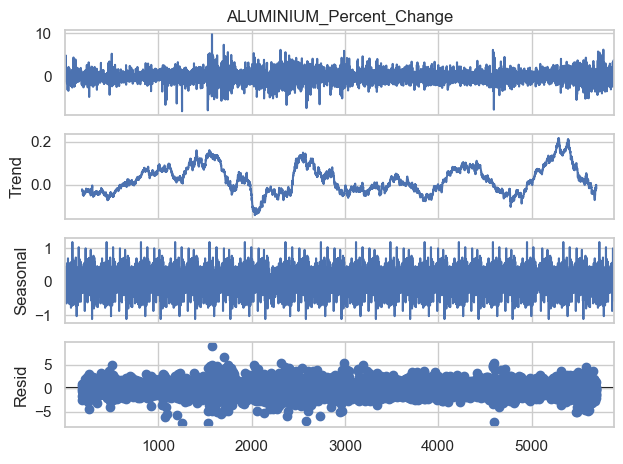

In [78]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['ALUMINIUM_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

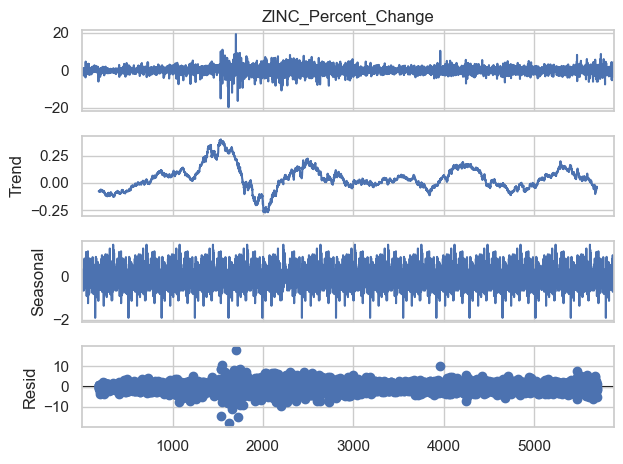

In [79]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['ZINC_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

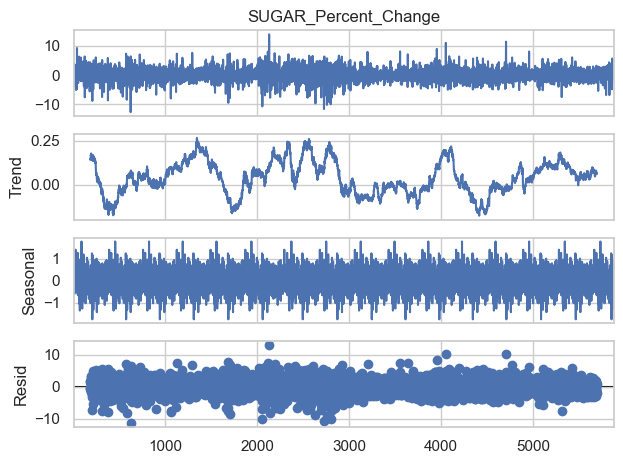

In [80]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['SUGAR_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

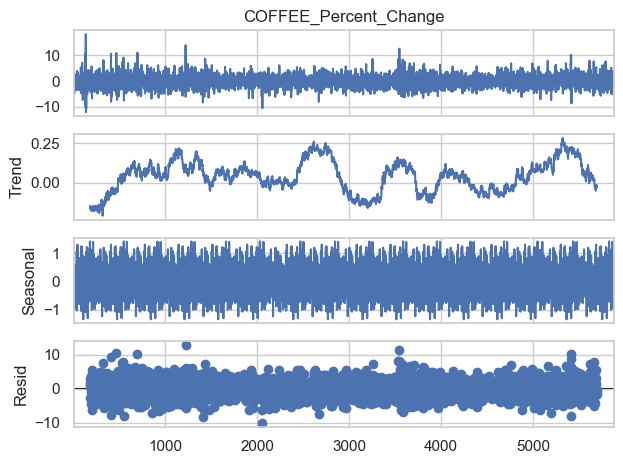

In [81]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['COFFEE_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

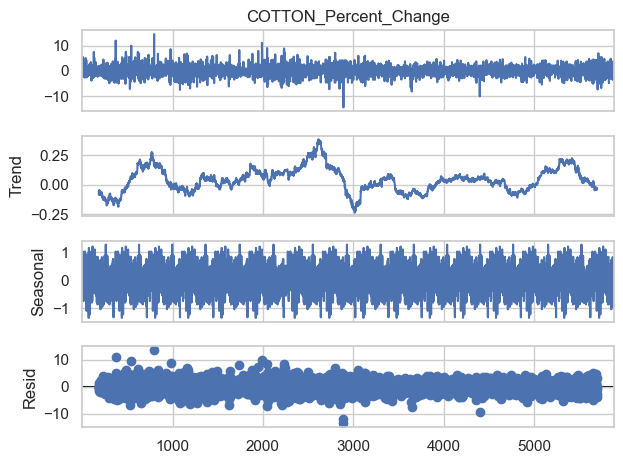

In [82]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['COTTON_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

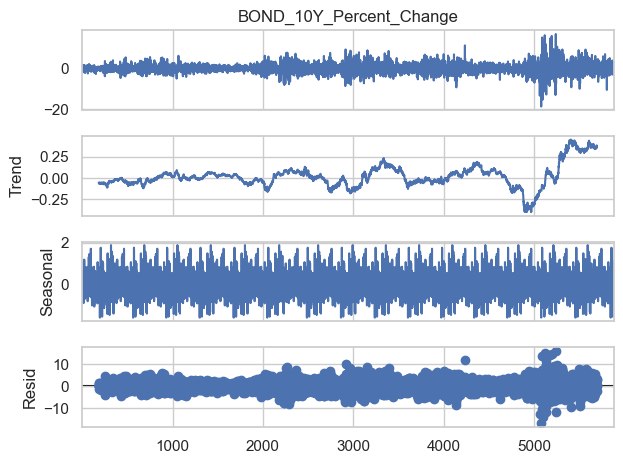

In [83]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['BOND_10Y_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

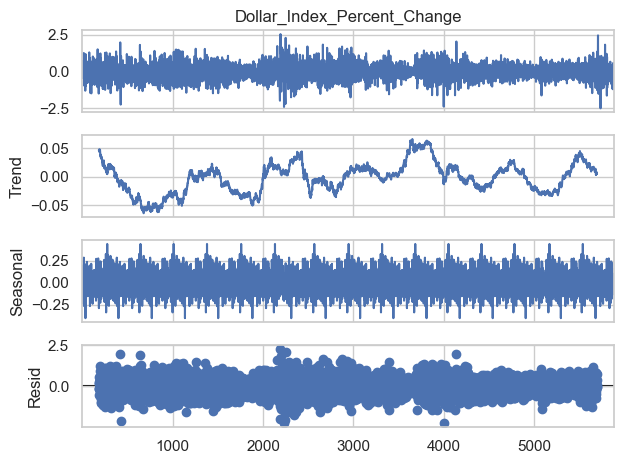

In [84]:
# Decompose a commodity's time series data
decomposition = seasonal_decompose(df1['Dollar_Index_Percent_Change'], model='additive', period=365)
#  Filter residuals greater than 25 and less than -25
residuals = decomposition.resid
residuals = np.where((residuals > 25) | (residuals < -25), np.nan, residuals)
decomposition.plot()
plt.show()

Correlation Matrix

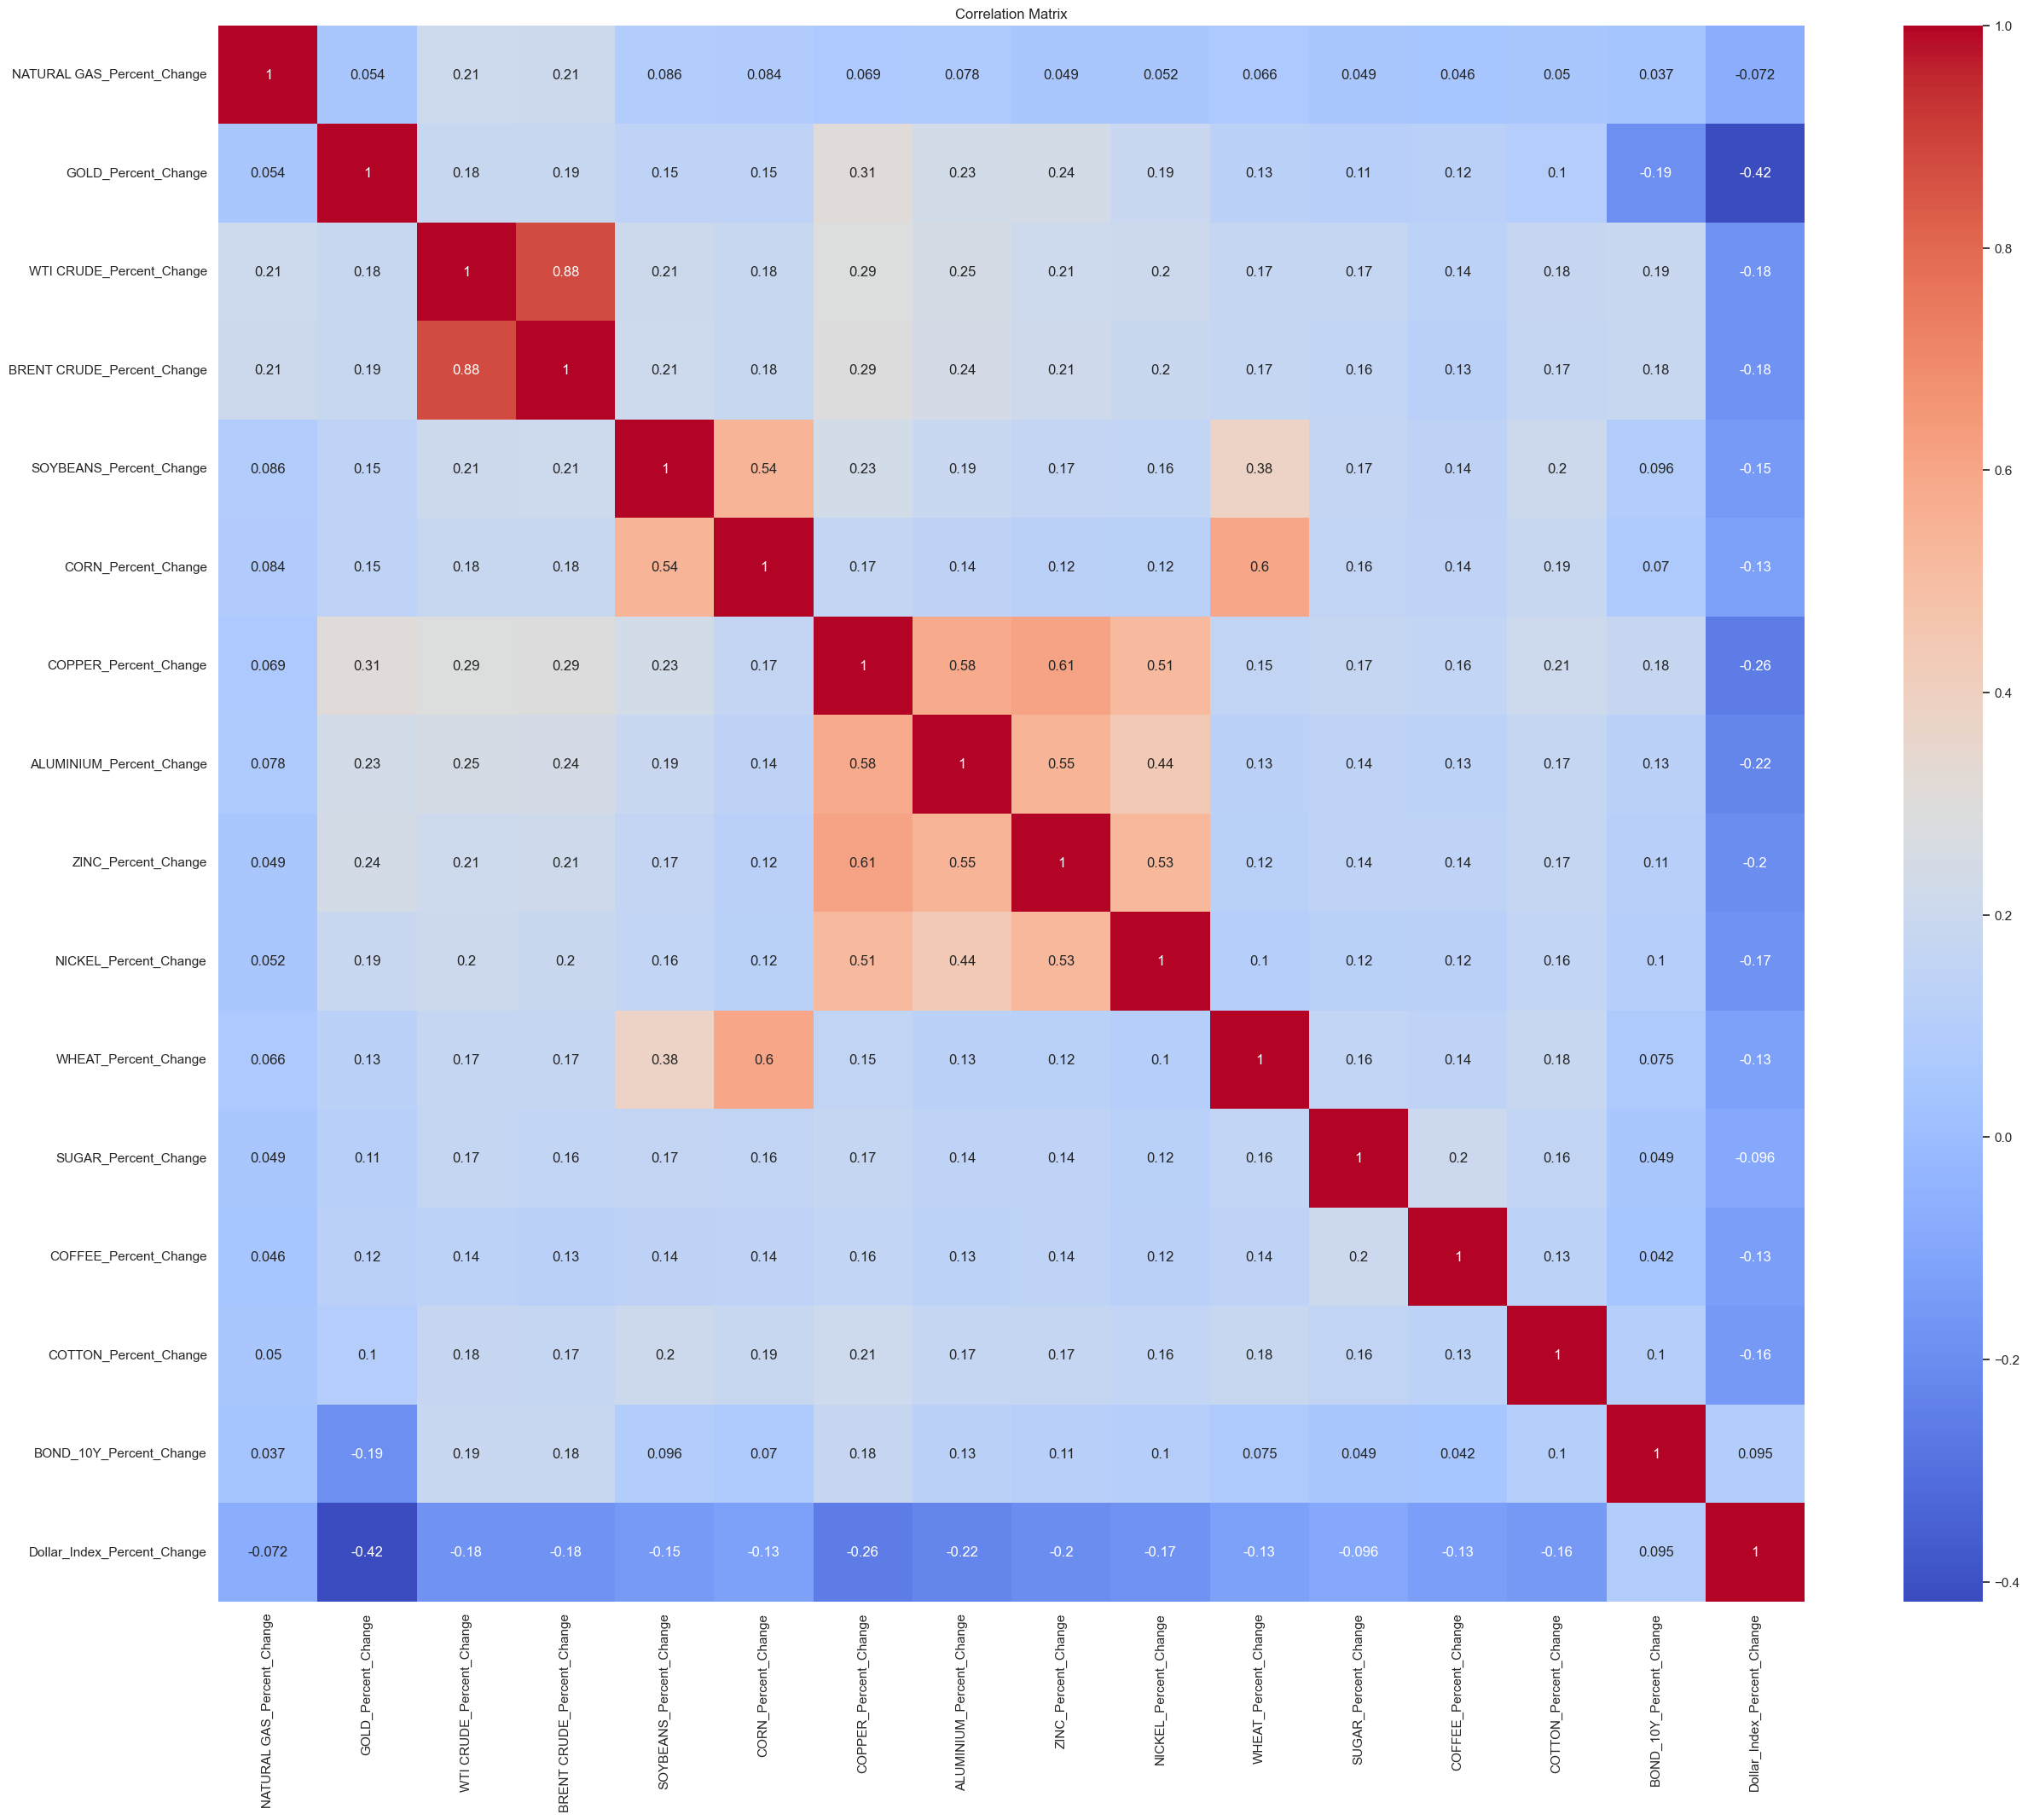

In [85]:
# Correlation matrix for data where outliers is there 
corr_matrix2 = df1.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [86]:
#data without feature enginnering
df1.to_csv('df1.csv') 

feature enginnering

In [87]:
#create new dataset 
df2 = df1.copy()
df2

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,WHEAT_Percent_Change,SUGAR_Percent_Change,COFFEE_Percent_Change,COTTON_Percent_Change,BOND_10Y_Percent_Change,Dollar_Index_Percent_Change
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,1.011122,0.693241,2.021505,1.636113,1.757900,-0.029884
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,-0.500501,-0.688468,-1.475548,1.008534,-0.757693,0.268982
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,1.307847,1.213172,-2.310655,3.609831,-0.687122,0.149033
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,0.695134,-0.171233,2.978537,-0.741290,0.830257,0.188487
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,0.098619,-2.744425,0.212675,1.157580,1.616346,-0.425785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,-5.294311,-1.215067,0.803213,1.614907,-1.559301,-0.453872
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,-6.594177,-1.309865,1.982038,-1.362272,-1.321036,0.088439
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,-2.027788,1.161344,-0.060735,1.673689,2.323819,0.431968
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,-1.878114,-0.779008,1.458523,-2.060550,0.666501,0.283473


In [88]:

# Define the number of lags and the window size for moving averages
num_lags = [1,3,5,7,9,20,21,100,200]
window_size = [5,10,20,21,100,200]
# Iterate through the columns of the dataset
for col in df1.columns:
    for num in num_lags:
        for lag in range(1, num+ 1):
            df2[f'{col}_Lag{lag}'] = df1[col].shift(lag)

    for win in window_size:
        # Moving Averages SMA
        df2[f'{col}_SMA{win}'] = df1[col].rolling(window=win).mean()
        # Moving Averages EMA
        df2[f'{col}_EMA{win}'] = df1[col].ewm(span=win, adjust=False).mean()

        # Standard Deviation
        df2[f'{col}_STD{win}'] = df1[col].rolling(window=win).std()

        # Historical Volatility (assuming daily returns)
        returns = df1[col]
        df2[f'{col}_HV'] = returns.rolling(window=win).std() * (252 ** 0.5)  # Annualized volatility (252 trading days)


   # RSI Calculation
    delta = df1[col]
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))
    rs = gain / loss
    df2[f'{col}_RSI'] = 100 - (100 / (1 + rs))
        
    # MACD Calculation
    df2[f'{col}_EMA12'] = df1[col].ewm(span=12, adjust=False).mean()
    df2[f'{col}_EMA26'] = df1[col].ewm(span=26, adjust=False).mean()
    df2[f'{col}_MACD'] = df2[f'{col}_EMA12'] - df2[f'{col}_EMA26']
               
    # Stochastic Oscillator
    min = df1[col].min()
    max = df1[col].max()
    df2[f'{col}_Stochastic_Oscillator'] = ((df1[col] - min) / 
                                               (max - min)) * 100
df2

C:\Users\swapn\AppData\Local\Temp\ipykernel_1824\898188287.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{col}_Lag{lag}'] = df1[col].shift(lag)
C:\Users\swapn\AppData\Local\Temp\ipykernel_1824\898188287.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{col}_Lag{lag}'] = df1[col].shift(lag)
C:\Users\swapn\AppData\Local\Temp\ipykernel_1824\898188287.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,...,Dollar_Index_Percent_Change_EMA100,Dollar_Index_Percent_Change_STD100,Dollar_Index_Percent_Change_SMA200,Dollar_Index_Percent_Change_EMA200,Dollar_Index_Percent_Change_STD200,Dollar_Index_Percent_Change_RSI,Dollar_Index_Percent_Change_EMA12,Dollar_Index_Percent_Change_EMA26,Dollar_Index_Percent_Change_MACD,Dollar_Index_Percent_Change_Stochastic_Oscillator
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,...,-0.029884,NaN,NaN,-0.029884,NaN,0.0,-0.029884,-0.029884,0.000000,48.737875
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,...,-0.023966,NaN,NaN,-0.026910,NaN,100.0,0.016096,-0.007746,0.023841,54.662951
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,...,-0.020540,NaN,NaN,-0.025159,NaN,100.0,0.036547,0.003868,0.032680,52.284933
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,...,-0.016401,NaN,NaN,-0.023034,NaN,100.0,0.059923,0.017543,0.042380,53.067118
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,...,-0.024508,NaN,NaN,-0.027041,NaN,0.0,-0.014802,-0.015296,0.000494,40.889059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,...,-0.045238,0.512155,-0.024512,-0.029724,0.634060,0.0,-0.046372,-0.066006,0.019634,40.332233
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,...,-0.042591,0.511897,-0.027816,-0.028548,0.631725,100.0,-0.025632,-0.054566,0.028933,51.083641
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,...,-0.033194,0.513206,-0.026927,-0.023966,0.632249,100.0,0.044768,-0.018526,0.063294,57.894174
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,...,-0.026923,0.513635,-0.021660,-0.020907,0.630414,100.0,0.081492,0.003844,0.077648,54.950243


In [89]:
df2.isnull().sum()

NATURAL GAS_Percent_Change                            0
GOLD_Percent_Change                                   0
WTI CRUDE_Percent_Change                              0
BRENT CRUDE_Percent_Change                            0
SOYBEANS_Percent_Change                               0
                                                     ..
Dollar_Index_Percent_Change_RSI                      68
Dollar_Index_Percent_Change_EMA12                     0
Dollar_Index_Percent_Change_EMA26                     0
Dollar_Index_Percent_Change_MACD                      0
Dollar_Index_Percent_Change_Stochastic_Oscillator     0
Length: 3600, dtype: int64

In [90]:
import itertools

# Get all combinations of column pairs
column_pairs = list(itertools.combinations(df1.columns, 2))

for col1, col2 in column_pairs:
    # Inter-Commodity Spread Calculation:
    df2[f'{col1}_{col2}_Spread'] = df1[col1] - df1[col2]

    # Ratio Calculation between Commodities:
    df2[f'{col1}_{col2}_Ratio'] = df1[col1] / df1[col2]
df2

C:\Users\swapn\AppData\Local\Temp\ipykernel_1824\1024405498.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{col1}_{col2}_Spread'] = df1[col1] - df1[col2]
C:\Users\swapn\AppData\Local\Temp\ipykernel_1824\1024405498.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'{col1}_{col2}_Ratio'] = df1[col1] / df1[col2]
C:\Users\swapn\AppData\Local\Temp\ipykernel_1824\1024405498.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,...,COFFEE_Percent_Change_BOND_10Y_Percent_Change_Spread,COFFEE_Percent_Change_BOND_10Y_Percent_Change_Ratio,COFFEE_Percent_Change_Dollar_Index_Percent_Change_Spread,COFFEE_Percent_Change_Dollar_Index_Percent_Change_Ratio,COTTON_Percent_Change_BOND_10Y_Percent_Change_Spread,COTTON_Percent_Change_BOND_10Y_Percent_Change_Ratio,COTTON_Percent_Change_Dollar_Index_Percent_Change_Spread,COTTON_Percent_Change_Dollar_Index_Percent_Change_Ratio,BOND_10Y_Percent_Change_Dollar_Index_Percent_Change_Spread,BOND_10Y_Percent_Change_Dollar_Index_Percent_Change_Ratio
1,-0.367647,-0.563976,-2.504892,-2.706027,1.077006,0.000000,1.002358,1.174652,-0.473251,-0.084195,...,0.263605,1.149954,2.051389,-67.645337,-0.121788,0.930720,1.665997,-54.749000,1.787784,-58.824362
2,1.291513,0.106345,-0.521879,-0.463548,-0.266383,0.369458,-0.408640,0.198595,0.227414,-0.662092,...,-0.717855,1.947421,-1.744530,-5.485673,1.766227,-1.331058,0.739552,3.749445,-1.026676,-2.816891
3,-1.047359,0.177054,-2.259887,-2.243861,0.747863,1.595092,0.117233,0.747065,-0.226898,-0.945225,...,-1.623533,3.362803,-2.459687,-15.504335,4.296953,-5.253554,3.460798,24.221720,-0.836155,-4.610540
4,1.978831,-0.070696,1.857969,2.771763,-1.113468,0.724638,-0.878220,-0.923123,-1.033699,-0.538292,...,2.148280,3.587489,2.790050,15.802355,-1.571547,-0.892844,-0.929777,-3.932845,0.641770,4.404851
5,1.985560,0.601344,4.458857,3.750527,0.160858,-0.599520,-0.354400,0.244387,-0.981826,-0.953260,...,-1.403670,0.131578,0.638460,-0.499490,-0.458765,0.716171,1.583365,-2.718696,2.042131,-3.796154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,...,2.362514,-0.515111,1.257085,-1.769691,3.174208,-1.035660,2.068779,-3.558068,-1.105430,3.435555
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,...,3.303074,-1.500366,1.893599,22.411454,-0.041236,1.031215,-1.450711,-15.403589,-1.409475,-14.937325
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,...,-2.384554,-0.026136,-0.492703,-0.140600,-0.650130,0.720232,1.241721,3.874569,1.891851,5.379612
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,...,0.792022,2.188329,1.175050,5.145186,-2.727051,-3.091594,-2.344024,-7.268937,0.383027,2.351194


In [91]:
df2.isnull().sum()

NATURAL GAS_Percent_Change                                    0
GOLD_Percent_Change                                           0
WTI CRUDE_Percent_Change                                      0
BRENT CRUDE_Percent_Change                                    0
SOYBEANS_Percent_Change                                       0
                                                             ..
COTTON_Percent_Change_BOND_10Y_Percent_Change_Ratio           0
COTTON_Percent_Change_Dollar_Index_Percent_Change_Spread      0
COTTON_Percent_Change_Dollar_Index_Percent_Change_Ratio       1
BOND_10Y_Percent_Change_Dollar_Index_Percent_Change_Spread    0
BOND_10Y_Percent_Change_Dollar_Index_Percent_Change_Ratio     3
Length: 3840, dtype: int64

In [92]:
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna()

In [93]:
df2 = df2.dropna()
df2

,NATURAL GAS_Percent_Change,GOLD_Percent_Change,WTI CRUDE_Percent_Change,BRENT CRUDE_Percent_Change,SOYBEANS_Percent_Change,CORN_Percent_Change,COPPER_Percent_Change,ALUMINIUM_Percent_Change,ZINC_Percent_Change,NICKEL_Percent_Change,...,COFFEE_Percent_Change_BOND_10Y_Percent_Change_Spread,COFFEE_Percent_Change_BOND_10Y_Percent_Change_Ratio,COFFEE_Percent_Change_Dollar_Index_Percent_Change_Spread,COFFEE_Percent_Change_Dollar_Index_Percent_Change_Ratio,COTTON_Percent_Change_BOND_10Y_Percent_Change_Spread,COTTON_Percent_Change_BOND_10Y_Percent_Change_Ratio,COTTON_Percent_Change_Dollar_Index_Percent_Change_Spread,COTTON_Percent_Change_Dollar_Index_Percent_Change_Ratio,BOND_10Y_Percent_Change_Dollar_Index_Percent_Change_Spread,BOND_10Y_Percent_Change_Dollar_Index_Percent_Change_Ratio
201,-5.298393,-0.073992,-1.702509,-1.157556,0.801710,0.242424,0.114679,0.905129,0.140384,1.384615,...,-1.667986,19.871160,-1.423979,5.283992,0.249626,-1.824209,0.493634,-0.485080,0.244007,0.265913
202,-0.282771,0.407257,2.552416,2.862720,-0.583245,-0.725514,-1.260023,-0.232558,0.186916,1.393296,...,-2.658094,10.389840,-3.129308,-15.633603,1.570912,-4.549318,1.099698,6.845364,-0.471214,-1.504701
203,2.734454,-0.405605,0.029630,1.486401,-1.226667,-0.974421,0.638051,0.066600,0.303172,-0.612245,...,-5.815486,7.069602,-7.097959,-20.884287,0.147580,0.845971,-1.134894,-2.499081,-1.282473,-2.954097
205,-3.340249,-1.443910,-1.228648,-0.728079,-0.160342,-0.367647,-1.502022,-1.385874,-1.522843,-0.961538,...,-2.634589,-1.351486,-2.425454,-1.661653,-0.227252,0.797168,-0.018117,0.980119,0.209135,1.229501
206,0.107319,-0.488355,2.275485,1.913265,-1.231263,-0.492005,-2.463343,-1.845581,-1.194939,-4.160888,...,-3.166628,14.850329,-3.403701,-402.218362,-0.372064,2.627348,-0.609137,-71.161212,-0.237073,-27.084811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,-2.380952,0.325915,-1.067437,-0.860832,2.029033,-3.094170,-0.294721,-1.266395,-0.579244,-3.882406,...,2.362514,-0.515111,1.257085,-1.769691,3.174208,-1.035660,2.068779,-3.558068,-1.105430,3.435555
5880,5.698234,1.274606,2.135098,1.566952,-5.629896,-5.485232,3.740132,3.806768,4.503556,2.825410,...,3.303074,-1.500366,1.893599,22.411454,-0.041236,1.031215,-1.450711,-15.403589,-1.409475,-14.937325
5881,-2.809415,-1.512307,-0.525672,-0.759701,0.069168,-1.388889,-2.482535,-1.571010,0.135728,0.280201,...,-2.384554,-0.026136,-0.492703,-0.140600,-0.650130,0.720232,1.241721,3.874569,1.891851,5.379612
5882,-3.242188,-0.170042,-2.310434,-2.013897,-1.175048,-1.760563,-1.663042,-2.298452,-3.429393,-3.650457,...,0.792022,2.188329,1.175050,5.145186,-2.727051,-3.091594,-2.344024,-7.268937,0.383027,2.351194


In [94]:
df2.to_csv('final_df.csv') 